# Natural Language Processing

## Importing the libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [16]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [17]:
#Cleaning the text 
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
review = re.sub("[^a-zA-Z]"," ", dataset["Review"][0])
review

[nltk_data] Downloading package stopwords to C:\Users\Mr
[nltk_data]     Vee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Wow    Loved this place '

In [18]:
review =review.lower()
review

'wow    loved this place '

In [19]:
review = review.split()

In [20]:
# stop_words = set(stopwords.words("english"))
# cleaned_review = []
# for word in review:     
#     if word not in stop_words:
#         cleaned_review.append(word)
# cleaned_review   

In [21]:
review = [word for word in review if not word in set(stopwords.words("english"))]
review

['wow', 'loved', 'place']

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
review

['wow', 'love', 'place']

In [23]:
review = " ".join(review)
review

'wow love place'

In [24]:
corpus =[]
for i  in range(0,1000):
    review = re.sub("[^a-zA-Z]"," ", dataset["Review"][i])
    review =review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)



In [25]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [26]:
# creating the bag of words model 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

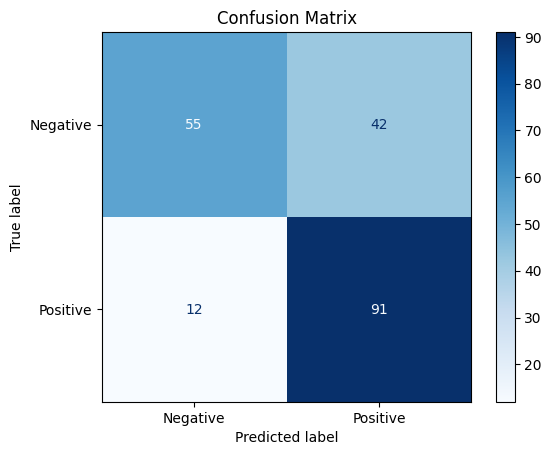

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: after training and predicting
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


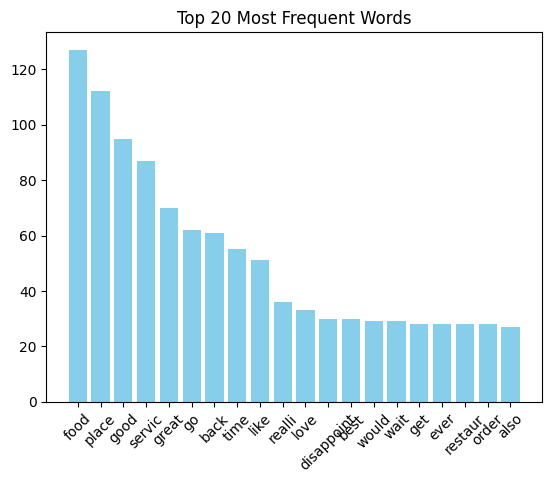

In [33]:
from collections import Counter

# Flatten all words in corpus into one big list
all_words = " ".join(corpus).split()
word_freq = Counter(all_words)

# Take the 20 most common
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.bar(words, counts, color="skyblue")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()
